In [32]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

from mujoco_py import MjSim, load_model_from_xml, set_act_gain_callback_fn

xml = '''
<mujoco>
    <worldbody>
        <body name="body1" pos="0 0 0">
            <joint axis="1 0 0" name="a" pos="0 0 0" type="hinge"/>
            <geom pos="0 0 0" size="1.0"/>
        </body>
    </worldbody>
    <actuator>
        <general joint="a" gaintype="user"/>
    </actuator>
</mujoco>
'''
sim = MjSim(load_model_from_xml(xml))

def reset():
    sim.reset()
    set_act_gain_callback_fn()

## Zero Control

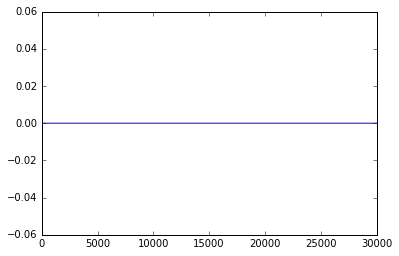

In [33]:
reset()
obs = [sim.data.qpos.copy() for _ in range(30000) if (sim.step() or True)]
plt.plot(obs)

## Constant Control

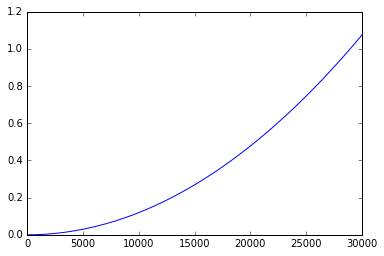

In [34]:
reset()
sim.data.ctrl[:] = 1
obs = [sim.data.qpos.copy() for _ in range(30000) if (sim.step() or True)]
plt.plot(obs)

## Position (P) Control

In [ ]:
def p(model, data, id_):
    ''' Calculate and return actuator gain '''
    print(model)
    print(data)
    print(id_)
    return 0.
    

reset()
set_act_gain_callback_fn(p)
sim.data.ctrl[:] = 1
obs = [sim.data.qpos.copy() for _ in range(30000) if (sim.step() or True)]
plt.plot(obs)